
## The implementation of Ngram Language Model with Logistic Regression


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime

import brown

In [0]:
def softmax(a):
    a = a-a.max() # to avoid numerical overflow
    exp_a = np.exp(a)
    return exp_a/exp_a.sum(axis=1, keepdims=True)

In [0]:
 def main():
    
    #training set: 2000 words, 2000 sentences.
    sentences, word2idx = brown.get_sentences_with_word2idx_limit_vocab(2000,2000)
    #for testing
    #sentences, word2idx = brown.get_sentences_with_word2idx_limit_vocab(10,10)
    V = len(word2idx)
    print(f"word total: {V}")
    start_idx= word2idx['START']
    end_idx = word2idx['END']
    print(f'Start index={start_idx} and End index = {end_idx}')
    
   
    #train a logistic model
    W = np.random.randn(V,V)/np.sqrt(V) #initial random values to W of shape V x V
    #print(f'W\n{W}')
    
    losses=[]
    epochs = 10
    lr = 1e-2
   
    t0=datetime.now()
    for epoch in range(epochs):
        print(f"In iteration NO.{epoch}")
        #suffle sentences each epoch
        random.shuffle(sentences) 
        
        j=0 #sentence counter
        for sentence in sentences:
            #convert sentence into one-hot coded inputs and targets
            sentence=[start_idx]+sentence+[end_idx] #pad with start and end tag
            #print(sentence)
            n = len(sentence)
            #print(f"Length of sentence {n}")
            
            # for each sentence of length n, there are n-1 bigrams
            inputs = np.zeros((n-1,V))# all first words of bigrams in the sentence
            targets = np.zeros((n-1,V))# all second words of bigrams in the sentence
            inputs[np.arange(n-1), sentence[:n-1]]=1#the sentence itself, ignoring the end index, shape n-1 x V
            targets[np.arange(n-1), sentence[1:]]=1#the next word of the target, shape n-1 x V
            # one-hot encoding of word vectors         
            #print (f'inputs:\n{inputs.shape}')
            #print(f'targets:\n{targets.shape}')
            
            #get output prediction
            #since we are using one-hot encoding, bias term is ignored.
            #p(y|x)
            predictions = softmax(inputs.dot(W)) #shape n-1 x V
            #print(f"Shape of predictions after softmax {predictions.shape}")#one for each word in the sentence
            #print(f"predictions:\n{predictions}")
            #do a gradient descent step
            # we perform a Mini-batch Gradient Descent algorithm
            d = inputs.T.dot(predictions-targets)
            W = W - lr*d 
            
            #keep track of the loss - cross entropy cost function, average loss for each sample            
            loss = -np.sum(targets*np.log(predictions))/(n-1)#array multiplication
            losses.append(loss)
            
            
                                   
            if j%1000==0:
                print(f"epoch: {epoch}, sentence: {j}/{len(sentences)}, loss: {loss}")
            
            j+=1
            
        
        print(f"Elapsed time training: {datetime.now()-t0}")
        plt.plot(losses)
   
        
        
        #plot a smoothed losses line to reduce variability
        def smoothed_loss(x, decay=0.99):
            y = np.zeros(len(x))
            last=0
            for t in range(len(x)):
                z = decay*last+ (1-decay)*x[t]
                y[t]= z/(1-decay**(t+1))
                last = z
            return y
        
        plt.plot(smoothed_loss(losses))
        plt.show()

Finish reading brown sentences
finished all sentences and build index
word total: 2001
Start index=0 and End index = 1
In iteration NO.0
epoch: 0, sentence: 0/20000, loss: 7.609201248074095
epoch: 0, sentence: 1000/20000, loss: 7.147905169907417
epoch: 0, sentence: 2000/20000, loss: 4.224180107063803
epoch: 0, sentence: 3000/20000, loss: 6.595361266490476
epoch: 0, sentence: 4000/20000, loss: 6.473633613738582
epoch: 0, sentence: 5000/20000, loss: 5.684818223620711
epoch: 0, sentence: 6000/20000, loss: 5.660990383468986
epoch: 0, sentence: 7000/20000, loss: 4.956788749674933
epoch: 0, sentence: 8000/20000, loss: 5.7020931607222
epoch: 0, sentence: 9000/20000, loss: 6.136342243214739
epoch: 0, sentence: 10000/20000, loss: 4.9369992725062195
epoch: 0, sentence: 11000/20000, loss: 5.52051767900269
epoch: 0, sentence: 12000/20000, loss: 4.902519794345958
epoch: 0, sentence: 13000/20000, loss: 5.846780700633008
epoch: 0, sentence: 14000/20000, loss: 3.6361501647093335
epoch: 0, sentence: 15

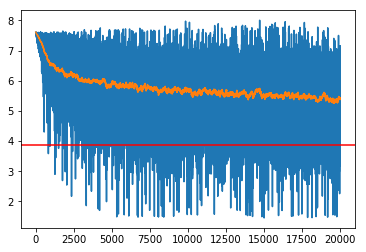

In [0]:
if __name__ == '__main__':
    main()